In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from scipy.signal import convolve2d

In [7]:
PATH = "../../sample_images"

In [8]:
data_df = pd.read_csv(f"{PATH}/nd2_temp/nd2_temp_features.csv")
data_df

,file_path,image_name,extension,T,C,Z,laplacian,tenengrad,brenners_gradient,fourier_magnitude,...,lbp_bin_0,lbp_bin_1,lbp_bin_2,lbp_bin_3,lbp_bin_4,lbp_bin_5,lbp_bin_6,lbp_bin_7,lbp_bin_8,lbp_bin_9
0,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,0,0,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,0,1,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,0,2,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,0,3,0.078125,0.006668,128,43.944492,...,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999939,0.000000
4,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,0,4,1.762695,0.031675,2888,73.271233,...,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999939,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,2,19,57873.218874,239.319482,91541000,171.259597,...,0.163574,0.108521,0.046326,0.038452,0.032959,0.041199,0.043030,0.098145,0.181152,0.246643
68,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,2,20,55139.389090,225.694919,83635526,170.260603,...,0.165527,0.108276,0.043518,0.035828,0.032288,0.045227,0.041626,0.096375,0.185303,0.246033
69,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,2,21,50287.619653,206.548745,73471416,168.695286,...,0.167908,0.109009,0.044067,0.035706,0.028992,0.040588,0.041321,0.101440,0.184387,0.246582
70,/Users/ranit/IAC/Project/ViTO/sample_images/nd...,100X MAM9X ZStack 2a copy,nd2,0,2,22,46084.435076,189.815755,63796964,167.345963,...,0.169678,0.109924,0.044006,0.032043,0.026245,0.038513,0.037964,0.100220,0.191101,0.250305


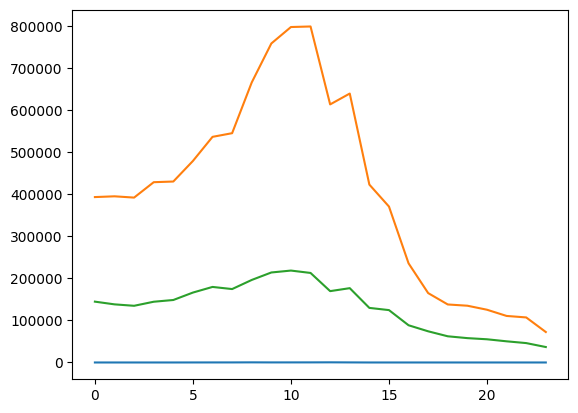

In [22]:
plt.plot(range(len(data_df[data_df.C==0])), data_df[data_df.C==0].laplacian)
plt.plot(range(len(data_df[data_df.C==1])), data_df[data_df.C==1].laplacian)
plt.plot(range(len(data_df[data_df.C==2])), data_df[data_df.C==2].laplacian)

/Users/ranit/IAC/Project/ViTO/BIA-QC/envs/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


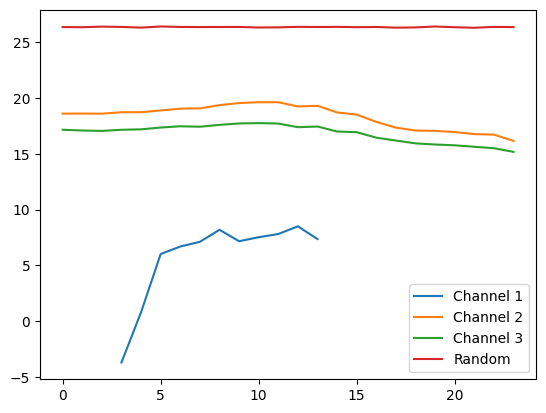

In [35]:
plt.plot(range(len(data_df[data_df.C==0])), np.log2(data_df[data_df.C==0].laplacian), label="Channel 1")
plt.plot(range(len(data_df[data_df.C==1])), np.log2(data_df[data_df.C==1].laplacian), label="Channel 2")
plt.plot(range(len(data_df[data_df.C==2])), np.log2(data_df[data_df.C==2].laplacian), label="Channel 3")

random_image_laplacian = []
for i in range(24):
    image = 4095*np.random.randint(2, size=(64,64), dtype=np.uint8)
    random_image_laplacian.append(cv.Laplacian(image, cv.CV_64F).var())

plt.plot(range(len(data_df[data_df.C==2])), np.log2(random_image_laplacian), label="Random")

plt.legend()

In [37]:
np.log2(random_image_laplacian)

array([26.33328936, 26.31783718, 26.36902373, 26.34288941, 26.28028153,
       26.38225517, 26.33983997, 26.33063226, 26.33620704, 26.33914486,
       26.29103325, 26.30350243, 26.34995678, 26.33531378, 26.34912896,
       26.32101138, 26.33788579, 26.27607373, 26.29785927, 26.38035792,
       26.31451441, 26.26760872, 26.34483872, 26.32761593])

In [15]:
800000*100/((4095**2)*16)

0.2981687963372945

In [31]:
image = np.random.randint(2, size=(64,64), dtype=np.uint8)
# image = cv.GaussianBlur(image, (5,5), 0)

print(cv.Laplacian(image, cv.CV_64F).var())

4.96872615814209


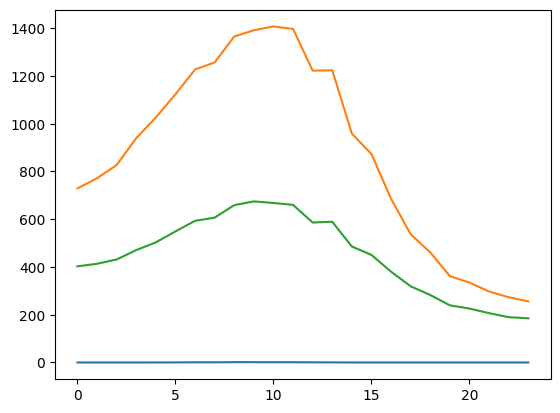

In [38]:
plt.plot(range(len(data_df[data_df.C==0])), data_df[data_df.C==0].tenengrad)
plt.plot(range(len(data_df[data_df.C==1])), data_df[data_df.C==1].tenengrad)
plt.plot(range(len(data_df[data_df.C==2])), data_df[data_df.C==2].tenengrad)

## Tenengrad

In [3]:
# horizontal edge

im = np.array([[0, 0, 1],
                [0, 0, 1],
                [0, 0, 1]])

sobel_hor = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

sobel_ver = np.array([[-1, -2, 1],
                        [0, 0, 0],
                        [1, 2, 1]])

print(convolve2d(im, sobel_hor, mode="valid"))
print(convolve2d(im, sobel_ver, mode="valid"))

[[-4]]
[[0]]


In [8]:
# vertical edge

im = np.array([[1, 1, 1],
                [0, 0, 0],
                [0, 0, 0]])

sobel_hor = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

sobel_ver = np.array([[-1, -2, 1],
                        [0, 0, 0],
                        [1, 2, 1]])

gx = convolve2d(im, sobel_hor, mode="valid")[0][0]
gy = convolve2d(im, sobel_ver, mode="valid")[0][0]
g = np.sqrt(((gx**2)+(gy**2)))
print(gx, gy, g)

0 4 4.0


In [9]:
# corner

im = np.array([[1, 1, 1],
                [0, 1, 1],
                [0, 0, 1]])

sobel_hor = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

sobel_ver = np.array([[-1, -2, 1],
                        [0, 0, 0],
                        [1, 2, 1]])

gx = convolve2d(im, sobel_hor, mode="valid")[0][0]
gy = convolve2d(im, sobel_ver, mode="valid")[0][0]
g = np.sqrt(((gx**2)+(gy**2)))
print(gx, gy, g)


-3 3 4.242640687119285


In [13]:
# corner

im = np.array([[0, 1, 1],
                [0, 0, 1],
                [0, 0, 0]])

sobel_hor = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

sobel_ver = np.array([[-1, -2, 1],
                        [0, 0, 0],
                        [1, 2, 1]])

gx = convolve2d(im, sobel_hor, mode="valid")[0][0]
gy = convolve2d(im, sobel_ver, mode="valid")[0][0]
g = np.sqrt(((gx**2)+(gy**2)))
print(gx, gy, g)

-765 765 1081.8733752154178


In [11]:
# corner

im = np.array([[1, 0, 1],
                [0, 1, 0],
                [0, 0, 1]])

sobel_hor = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

sobel_ver = np.array([[-1, -2, 1],
                        [0, 0, 0],
                        [1, 2, 1]])

gx = convolve2d(im, sobel_hor, mode="valid")[0][0]
gy = convolve2d(im, sobel_ver, mode="valid")[0][0]
g = np.sqrt(((gx**2)+(gy**2)))
print(gx, gy, g)

-1 1 1.4142135623730951
